In [1]:
from ultralytics import YOLOv10

In [2]:
model = YOLOv10.from_pretrained('jameslahm/yolov10n')

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/11.2M [00:00<?, ?B/s]

In [3]:
image_path = 'litter_survey_dataset/2024-07-21/RayBan/photo-21700_singular_display_fullPicture.jpeg'


requirements: Ultralytics requirement ['shapely>=2.0.0'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.1s, installed 1 package: ['shapely>=2.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

(4032, 3024, 3)

0: 640x480 1 bench, 121.0ms
Speed: 4.6ms preprocess, 121.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
4 2431 809 4014


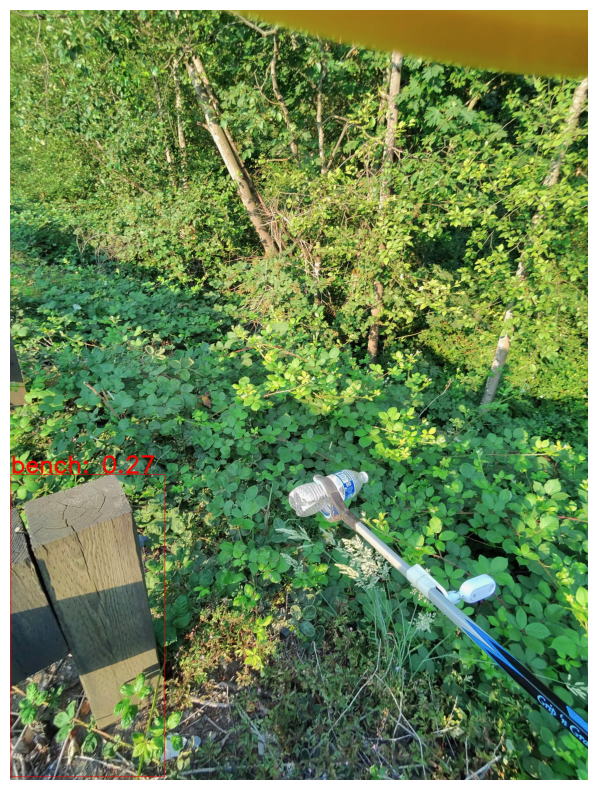

In [4]:
from ultralytics import YOLO
from ultralytics.solutions import object_counter
import cv2
import matplotlib.pyplot as plt


def run_inference(image_path, model):
    # Read the input image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    
    print(image.shape)
  
    # Run inference on the image
    results = model.predict(image)
    
    # Loop through the results and draw bounding boxes
    for result in results:
        for box in result.boxes:
            # Get the bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
            print(f"{x1} {y1} {x2} {y2}")
            
            # Draw the bounding box on the image
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red color in RGB
            
            # Get the class label and confidence score
            label = result.names[int(box.cls[0].cpu().numpy())]
            confidence = float(box.conf[0].cpu().numpy())
            
            # Draw the label and confidence score on the image with increased text size
            font_scale = 4  # Increased from 0.5 to 5 for 10x larger text
            thickness = 10  # Increased thickness for better visibility at larger scale
            cv2.putText(image_rgb, f"{label}: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), thickness, cv2.LINE_AA)
    
    # Display the image with bounding boxes using Matplotlib
    plt.figure(figsize=(10,10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()



# Run the inference
run_inference(image_path, model)

In [5]:
# Load training data